In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('purchase.xlsx')
df.head()

C:\sofware\anaconda3\envs\udemy\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Vendor Name,Model,INVOICE,Type,Purchase Date,Price,GST,Quantity,Total,Payment Status
0,ASHOK TRADING CO,Apacs Dual Power UnStrunged,7516/22-23,Racquet,2022-12-05,1339.0,0.12,5,7498.40,UNPAID
1,ASHOK TRADING CO,Apacs Vanguard11 UnStrunged,7516/22-23,Racquet,2022-12-05,1429.0,0.12,2,3200.96,UNPAID
2,ASHOK TRADING CO,Apacs Ziggler Grey UnStrunged,7516/22-23,Racquet,2022-12-05,1384.0,0.12,5,7750.40,UNPAID
3,ASHOK TRADING CO,SF Red Cricket Ball,7516/22-23,Cricket,2022-12-05,252.0,0.12,6,1693.44,UNPAID
4,ASHOK TRADING CO,SF Pink Cricket Ball,7516/22-23,Cricket,2022-12-05,263.0,0.12,6,1767.36,UNPAID


In [3]:
df.groupby('Type').sum()

,Price,GST,Quantity,Total
Type,,,,
Accessory,3723.59,1.56,95,22626.6656
Cricket,515.00,0.24,12,3460.8000
Racquet,23294.46,2.04,50,76428.8448


In [4]:
df[(df['Model'] == 'Apacs Ziggler Grey Strunged') ]

,Vendor Name,Model,INVOICE,Type,Purchase Date,Price,GST,Quantity,Total,Payment Status
10,Pankaj Sports,Apacs Ziggler Grey Strunged,INV/97/22-23,Racquet,2022-12-08,1428.57,0.12,4,6399.9936,UNPAID
17,Pankaj Sports,Apacs Ziggler Grey Strunged,INV/94/22-23,Racquet,2022-12-05,1428.57,0.12,2,3199.9968,PAID
21,Pankaj Sports,Apacs Ziggler Grey Strunged,INV/95/22-23,Racquet,2022-12-06,1428.57,0.12,4,6399.9936,PAID
26,Pankaj Sports,Apacs Ziggler Grey Strunged,-,Racquet,2022-12-01,1428.57,0.12,5,7999.9920,PAID


In [5]:
# collect all model types
purchased = dict()
def collect_models(models,df):
    for model in models:
        m = df[(df['Model'].isin([model] )) ]
        purchased[model] = m['Quantity'].sum()

In [6]:
racquet = df[(df['Type'] == 'Racquet') ]
collect_models(racquet['Model'],df)
df_purchased = pd.DataFrame(list(purchased.items()),columns = ['Model','Quantity'])
df_purchased.set_index('Model',inplace=True)
df_purchased

,Quantity
Model,
Apacs Dual Power UnStrunged,5
Apacs Vanguard11 UnStrunged,2
Apacs Ziggler Grey UnStrunged,5
Yonex Astrox 21i,6
Yonex Astrox 27i,2
Apacs Ziggler Grey Strunged,15
Apacs Vanguard11 Strunged,4
Yonex Voltric 25i,2
Apacs Finapi232 Strunged,7


In [7]:
#total = df.loc[['Apacs Ziggler Grey UnStrunged', 'Apacs Ziggler Grey Strunged']].sum()

#z = df_purchased.loc[['Apacs Ziggler Grey UnStrunged','Apacs Ziggler Grey Strunged']]
#d = df_purchased.loc[['Apacs Dual Power UnStrunged']]
#d = df_purchased.loc[['Apacs Vanguard11 UnStrunged','Apacs Vanguard11 Strunged']]
#d = df_purchased.loc[['Apacs Finapi232 Strunged']]
#d
ndf = pd.DataFrame(data=
    [('Apacs Ziggler',df_purchased.loc[['Apacs Ziggler Grey UnStrunged','Apacs Ziggler Grey Strunged']].sum()[0]),
     ('Apacs Dual Power',df_purchased.loc[['Apacs Dual Power UnStrunged']].sum()[0]),
     ('Apacs Vanguard11',df_purchased.loc[['Apacs Vanguard11 UnStrunged','Apacs Vanguard11 Strunged']].sum()[0]),
     ('Apacs Finapi232',df_purchased.loc[['Apacs Finapi232 Strunged']].sum()[0]),
     ('Yonex Voltric 20i',df_purchased.loc[['Yonex Voltric 20i']].sum()[0]),
     ('Yonex Astrox 21i',df_purchased.loc[['Yonex Astrox 21i']].sum()[0]),
     ('Yonex Voltric 25i',df_purchased.loc[['Yonex Voltric 25i']].sum()[0]),
     ('Yonex Astrox 27i',df_purchased.loc[['Yonex Astrox 27i']].sum()[0]),
    ],columns=['Model','Quantity'])
#ndf.set_index('Model',inplace=True)
ndf.sort_values('Quantity',ascending=False,inplace=True)
ndf

,Model,Quantity
0,Apacs Ziggler,20
3,Apacs Finapi232,7
2,Apacs Vanguard11,6
5,Yonex Astrox 21i,6
1,Apacs Dual Power,5
4,Yonex Voltric 20i,2
6,Yonex Voltric 25i,2
7,Yonex Astrox 27i,2


(0.0, 25.0)

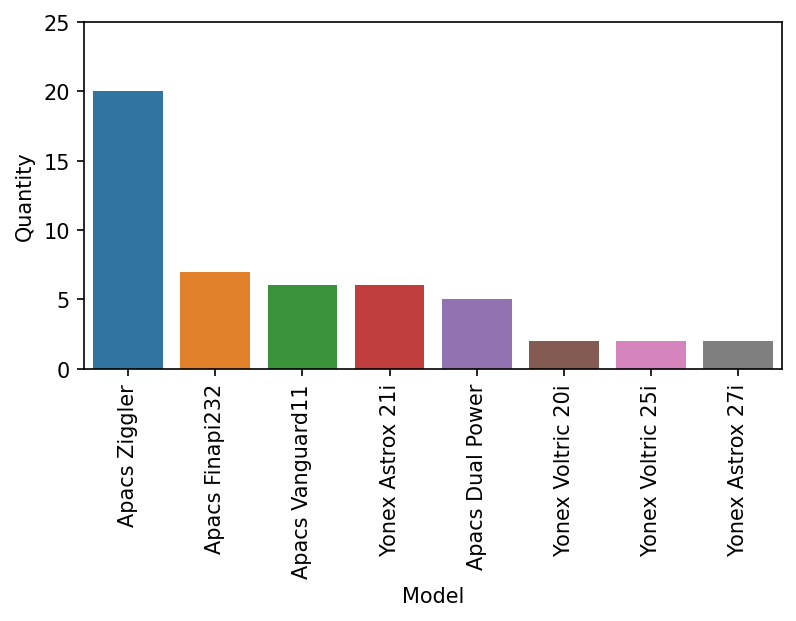

In [8]:
plt.figure(figsize=(6,3),dpi=150)
sns.barplot(x='Model',y='Quantity', data=ndf)
plt.xticks(rotation=90);
plt.ylim(0,25)

In [9]:
ndf['Quantity'].sum()

50

In [12]:
total = df['Total'].sum()

In [19]:
paid = df[(df['Payment Status'] == 'PAID') ]
paid = paid['Total'].sum()

In [21]:
not_paid = df[(df['Payment Status'] == 'UNPAID') ]
not_paid = not_paid['Total'].sum()

In [24]:
balance = total - paid
balance

55141.7216